<a href="https://colab.research.google.com/github/FurqanMujahid/PovertyRateAnalysis/blob/main/PovertyRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
import dash_core_components as dcc
import dash_html_components as html

<ipython-input-2-2390f034339e>:8: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-2390f034339e>:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
df = pd.read_csv("poverty-wb.csv")

In [ ]:
df.head()

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio,top1_thr,top1_share,top1_avg,top90_99_share
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,...,47.887080,0.898303,3.925521,3.566505,1.888392,1.888647,20.398596,3.279147,25.863335,17.431850
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,...,46.057724,1.208872,4.818478,3.995204,2.092198,1.909572,30.447906,4.978898,40.283485,20.360987
2,Albania,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.405670,98.85736,99.546940,...,46.378323,1.141011,4.649161,3.874336,1.979621,1.957110,30.710506,4.780271,43.751460,19.551355
3,Albania,2008,0.000000,0.199925,3.902613,33.431850,62.768870,94.582830,98.50923,99.344450,...,45.693516,1.112703,4.389617,3.574216,1.957677,1.825743,35.538715,5.624065,56.314020,18.816364
4,Albania,2012,0.024101,0.620691,4.805442,36.667750,65.062386,95.520160,99.07353,99.742485,...,46.957817,1.040717,4.271997,3.630154,1.942752,1.868563,29.445091,4.124251,39.094590,18.805405


In [ ]:
df.tail()

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio,top1_thr,top1_share,top1_avg,top90_99_share
2700,Zambia,2015,32.625584,60.793095,78.000960,91.015350,95.33152,98.915600,99.545610,99.777664,...,42.370922,4.587686,19.198305,13.158383,3.942967,3.337178,20.989138,12.227663,36.373080,31.193613
2701,Zambia,2022,33.404160,64.349754,80.967804,93.166560,96.97828,99.504370,99.832695,99.928055,...,44.512245,3.496669,14.643391,11.092008,3.718168,2.983192,15.232804,9.455619,23.899895,29.630210
2702,Zimbabwe,2011,0.000000,21.580000,47.857002,77.945000,88.90500,97.352000,98.956000,99.509000,...,44.501900,2.207938,8.526846,6.642715,2.776684,2.392320,30.511800,7.884784,43.006950,25.945340
2703,Zimbabwe,2017,2.398895,34.206043,61.583572,84.109024,92.46122,98.468330,99.412650,99.762436,...,44.156500,2.305557,8.566765,6.556821,3.066078,2.138504,23.845890,8.752902,38.545918,26.049522
2704,Zimbabwe,2019,7.359053,39.754530,64.509860,85.016320,91.42378,97.476456,98.799060,99.511925,...,45.562761,1.867628,8.116422,8.175637,3.397768,2.406179,32.899090,6.735431,50.489372,22.500481


In [ ]:
df.describe()

,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,...,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio,top1_thr,top1_share,top1_avg,top90_99_share
count,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2.705000e+03,...,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000
mean,2006.331238,3.030065,11.621761,22.156616,37.439542,47.253175,64.786984,75.007388,82.329709,1.458295e+07,...,45.562761,1.867628,8.116422,6.636767,2.537812,2.463035,88.906004,6.735431,143.227825,22.500481
std,10.924993,6.961873,18.431639,27.404091,34.453300,36.585892,35.732330,30.594955,24.210950,5.153280e+07,...,2.044009,1.041768,5.188398,5.009968,0.923962,1.028039,66.955100,2.831957,103.397873,3.795331
min,1963.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.723412,5.955263,12.860626,0.000000e+00,...,24.923405,0.595276,2.446666,2.286238,1.501516,1.505083,2.710895,0.663349,2.990088,14.853324
25%,1999.000000,0.033707,0.264845,0.755929,2.266828,5.236441,27.495121,55.707050,73.724270,1.982000e+03,...,44.973576,1.208380,4.983525,4.014286,2.037081,1.971397,32.000000,4.953803,60.184372,19.773293
50%,2008.000000,0.377068,1.792190,8.890161,29.958424,50.432884,80.912766,90.767960,95.075000,7.333100e+04,...,45.612880,1.610761,6.949213,5.342738,2.321488,2.267084,73.667046,6.406800,143.227825,22.500481
75%,2015.000000,2.115218,14.606982,36.998000,67.579124,82.642610,96.730080,98.828900,99.460550,1.290650e+06,...,46.714005,1.930824,8.255804,7.435897,2.763292,2.738930,128.352450,7.349022,188.223300,24.262209
max,2024.000000,66.942320,96.871000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,4.809616e+08,...,52.087090,12.442459,59.220303,115.657950,11.335615,32.552197,384.121950,44.964348,618.797200,40.187310


In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Country                      0
Year                         0
Share below $1 a day         0
Share below $2.15 a day      0
Share below $3.65 a day      0
                          ... 
p50_p10_ratio               72
top1_thr                    72
top1_share                 423
top1_avg                   422
top90_99_share             423
Length: 127, dtype: int64


In [ ]:
print("Data types:\n", df.dtypes)

Data types:
 Country                     object
Year                         int64
Share below $1 a day       float64
Share below $2.15 a day    float64
Share below $3.65 a day    float64
                            ...   
p50_p10_ratio              float64
top1_thr                   float64
top1_share                 float64
top1_avg                   float64
top90_99_share             float64
Length: 127, dtype: object


In [ ]:
poverty_columns = ['Country', 'Year', 'Share below $1 a day', 'Share below $2.15 a day']
df[poverty_columns].isnull().sum()

,0
Country,0
Year,0
Share below $1 a day,0
Share below $2.15 a day,0


In [ ]:
poverty_aggregates = df.groupby('Country')[
    ['Share below $1 a day', 'Share below $2.15 a day']
].mean().reset_index()
print(poverty_aggregates)

                     Country  Share below $1 a day  Share below $2.15 a day
0                    Albania              0.010657                 0.396635
1                    Algeria              0.000000                 4.179667
2                     Angola              6.202599                22.357419
3          Argentina (urban)              0.949529                 2.444236
4                    Armenia              0.110905                 3.052280
..                       ...                   ...                      ...
190  World (excluding China)              3.410754                19.431433
191  World (excluding India)              4.168740                18.395943
192                    Yemen              0.653526                12.814767
193                   Zambia             27.448918                58.218769
194                 Zimbabwe              3.252649                31.846858

[195 rows x 3 columns]


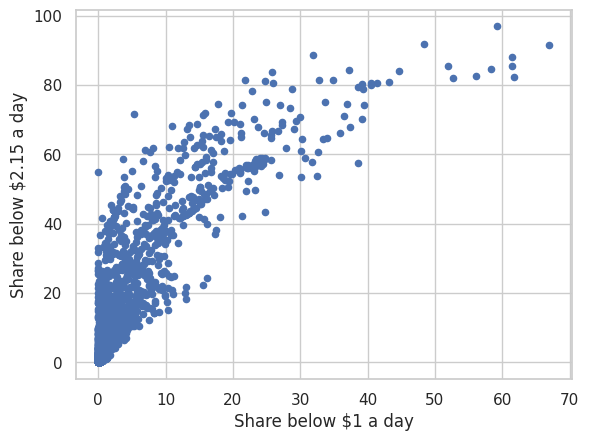

In [ ]:
df.plot.scatter(x='Share below $1 a day', y='Share below $2.15 a day')
plt.show()

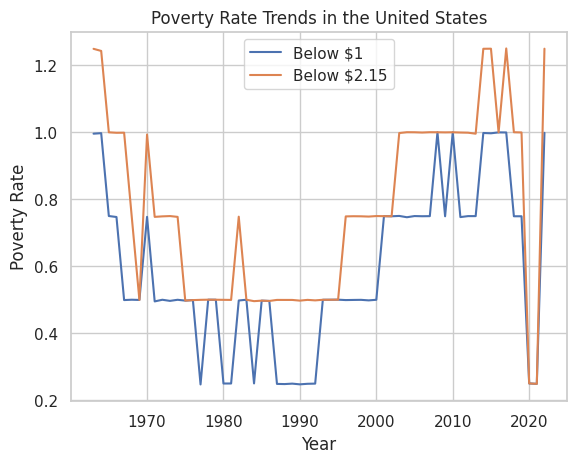

In [ ]:
country_data = df[df['Country'] == 'United States']

plt.plot(country_data['Year'], country_data['Share below $1 a day'], label='Below $1')
plt.plot(country_data['Year'], country_data['Share below $2.15 a day'], label='Below $2.15')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Trends in the United States')
plt.legend()
plt.show()

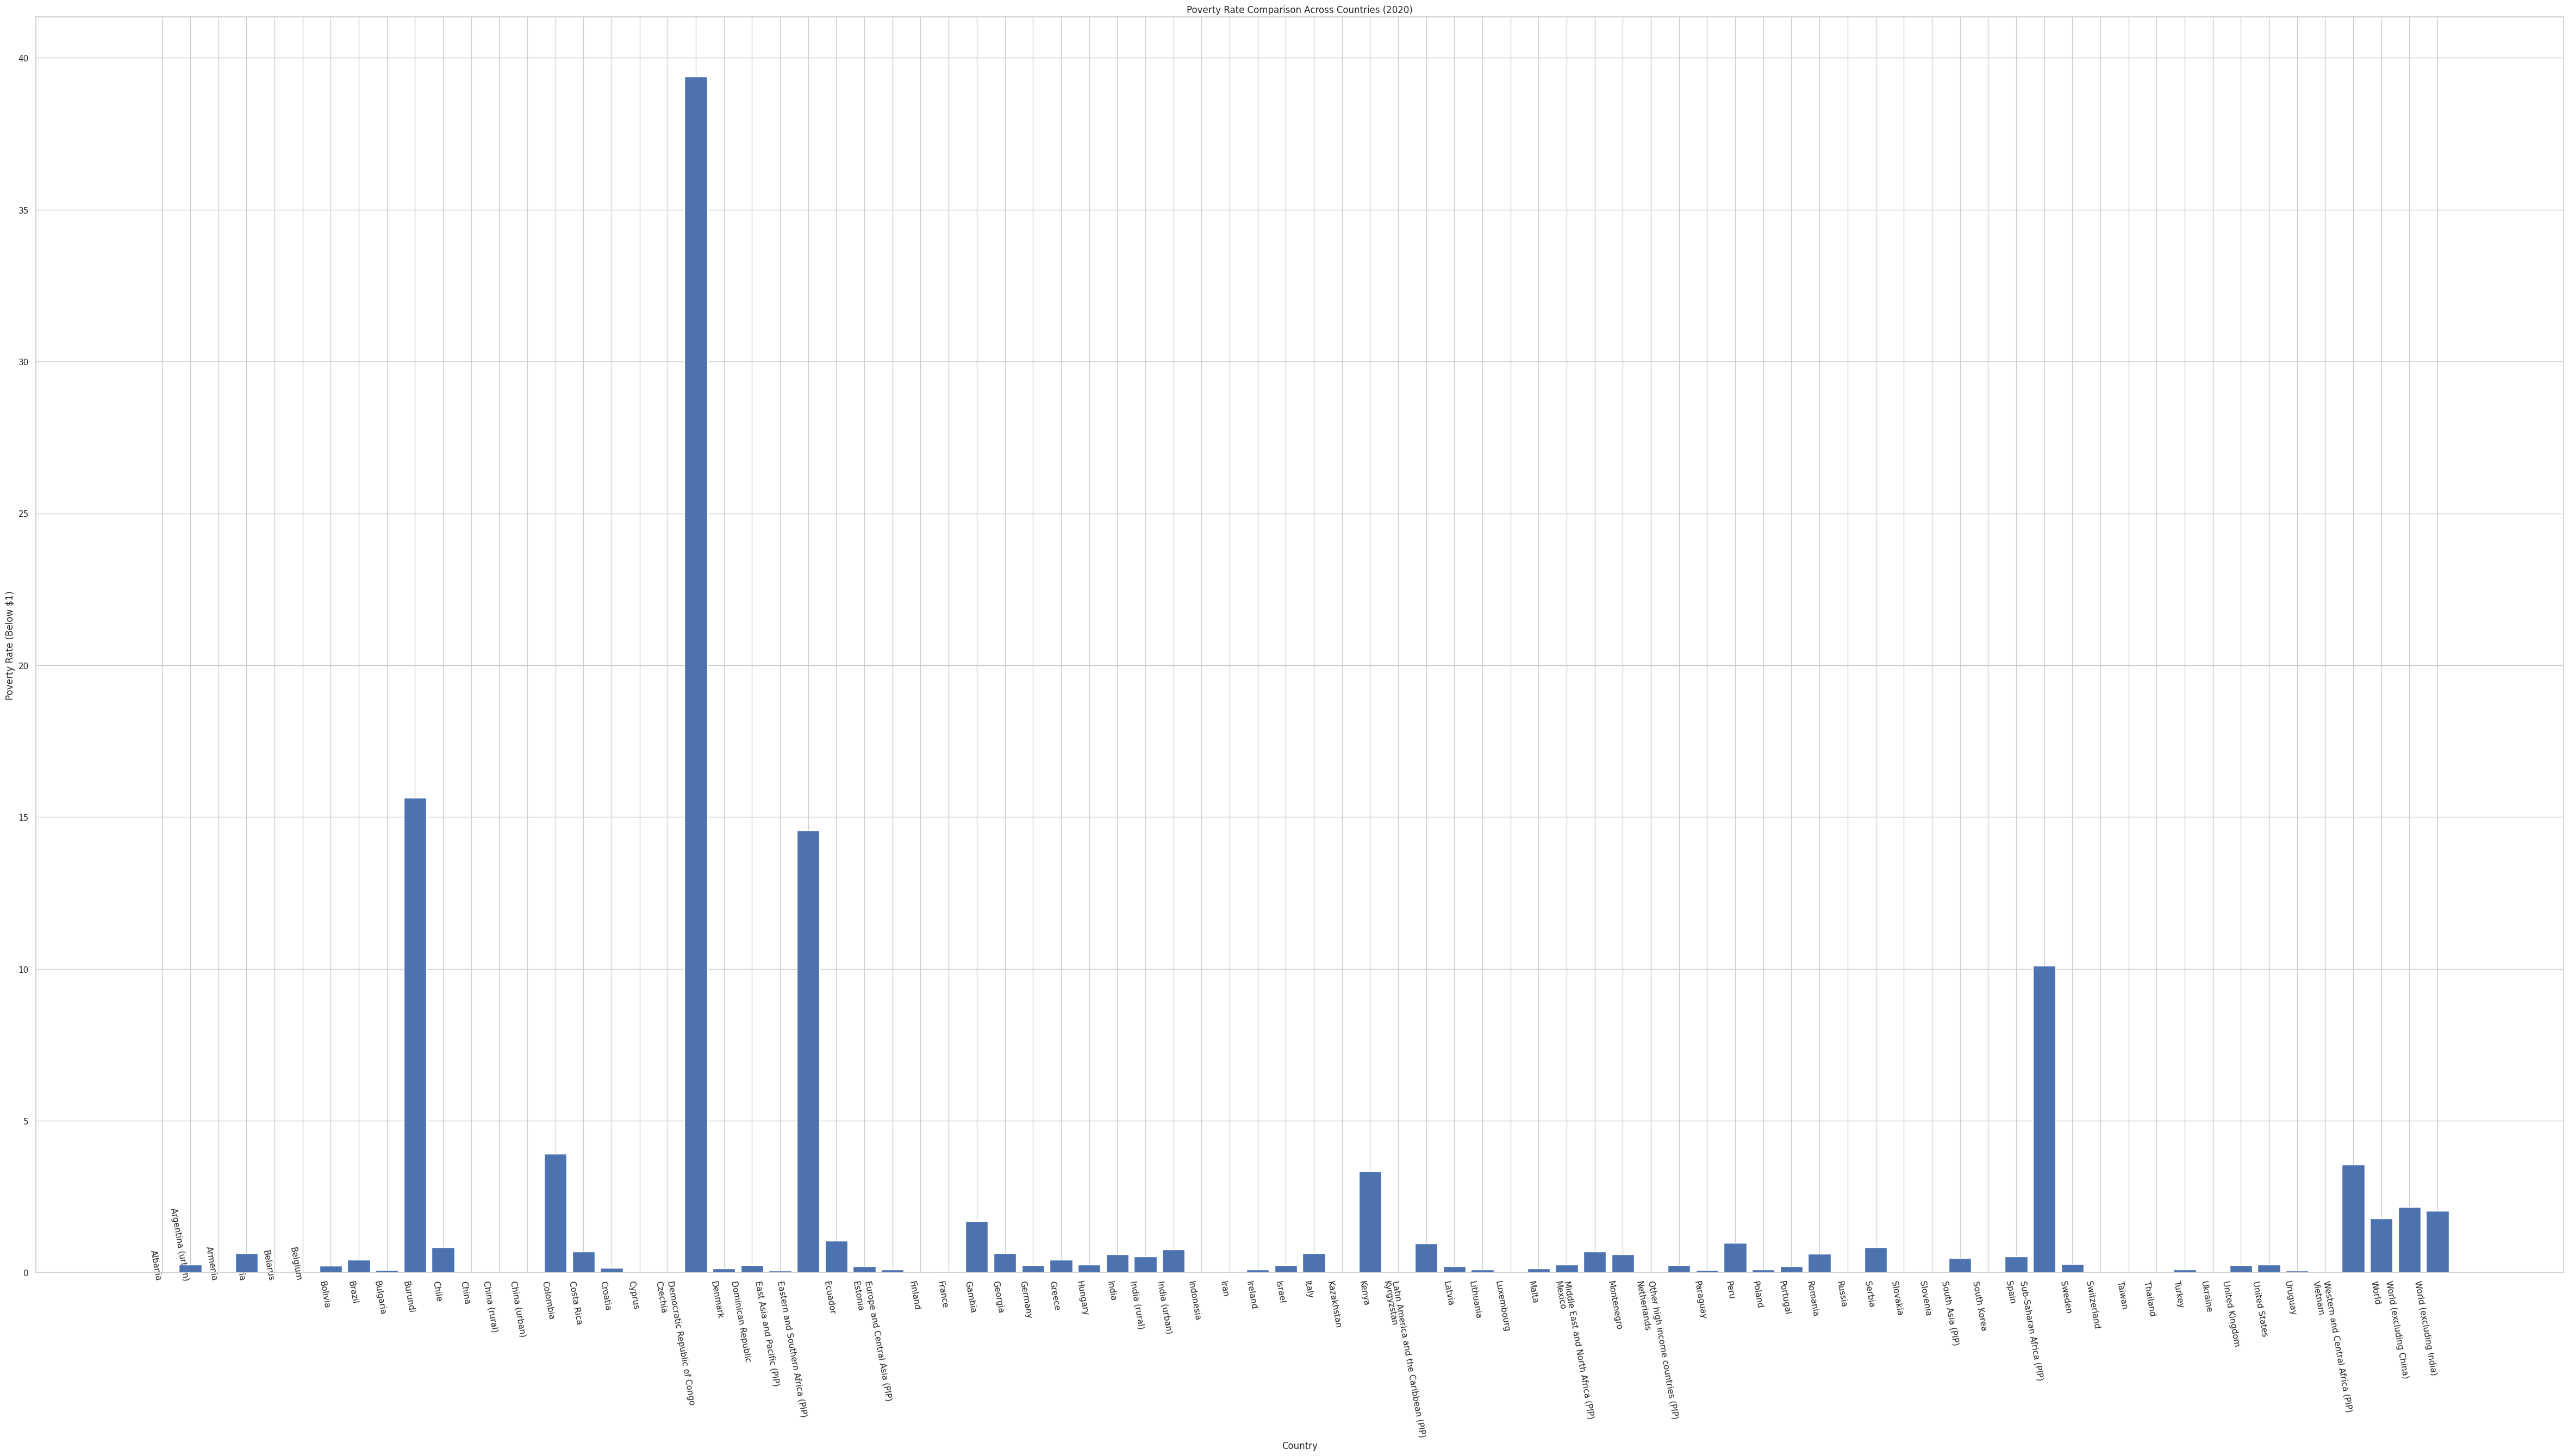

In [ ]:
plt.figure(figsize=(60, 30))
plt.xticks(rotation=45, ha='right', wrap=True)
year_data = df[df['Year'] == 2020]
plt.bar(year_data['Country'], year_data['Share below $1 a day'])
plt.xlabel('Country')
plt.ylabel('Poverty Rate (Below $1)')
plt.title('Poverty Rate Comparison Across Countries (2020)')
plt.xticks(rotation=1000)
plt.show()

In [ ]:
filtered_data = df[(df['Country'] == 'India') & (df['Year'] == 2020)]

fig = px.bar(filtered_data, x="Country", y=["Share below $1 a day", "Share below $2.15 a day", "Share below $3.65 a day"],
              title="Income Distribution in the India(2020)")
fig.show()

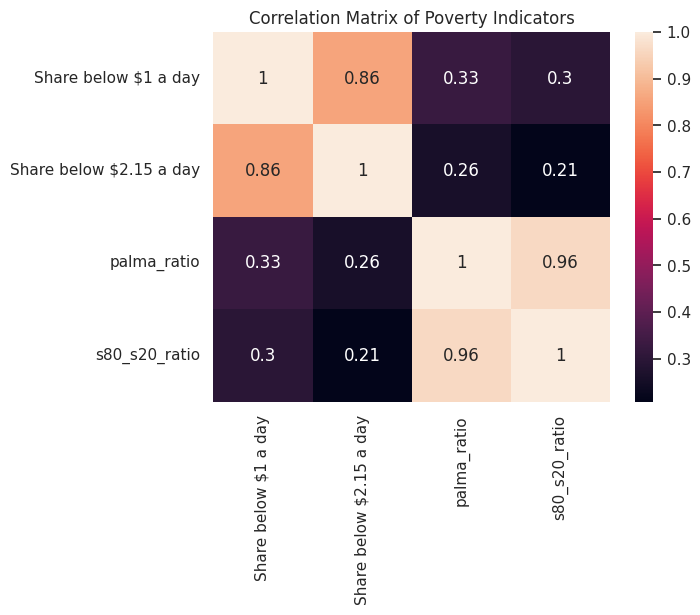

In [ ]:
correlation_matrix = df[['Share below $1 a day', 'Share below $2.15 a day', 'palma_ratio', 's80_s20_ratio']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Poverty Indicators')
plt.show()

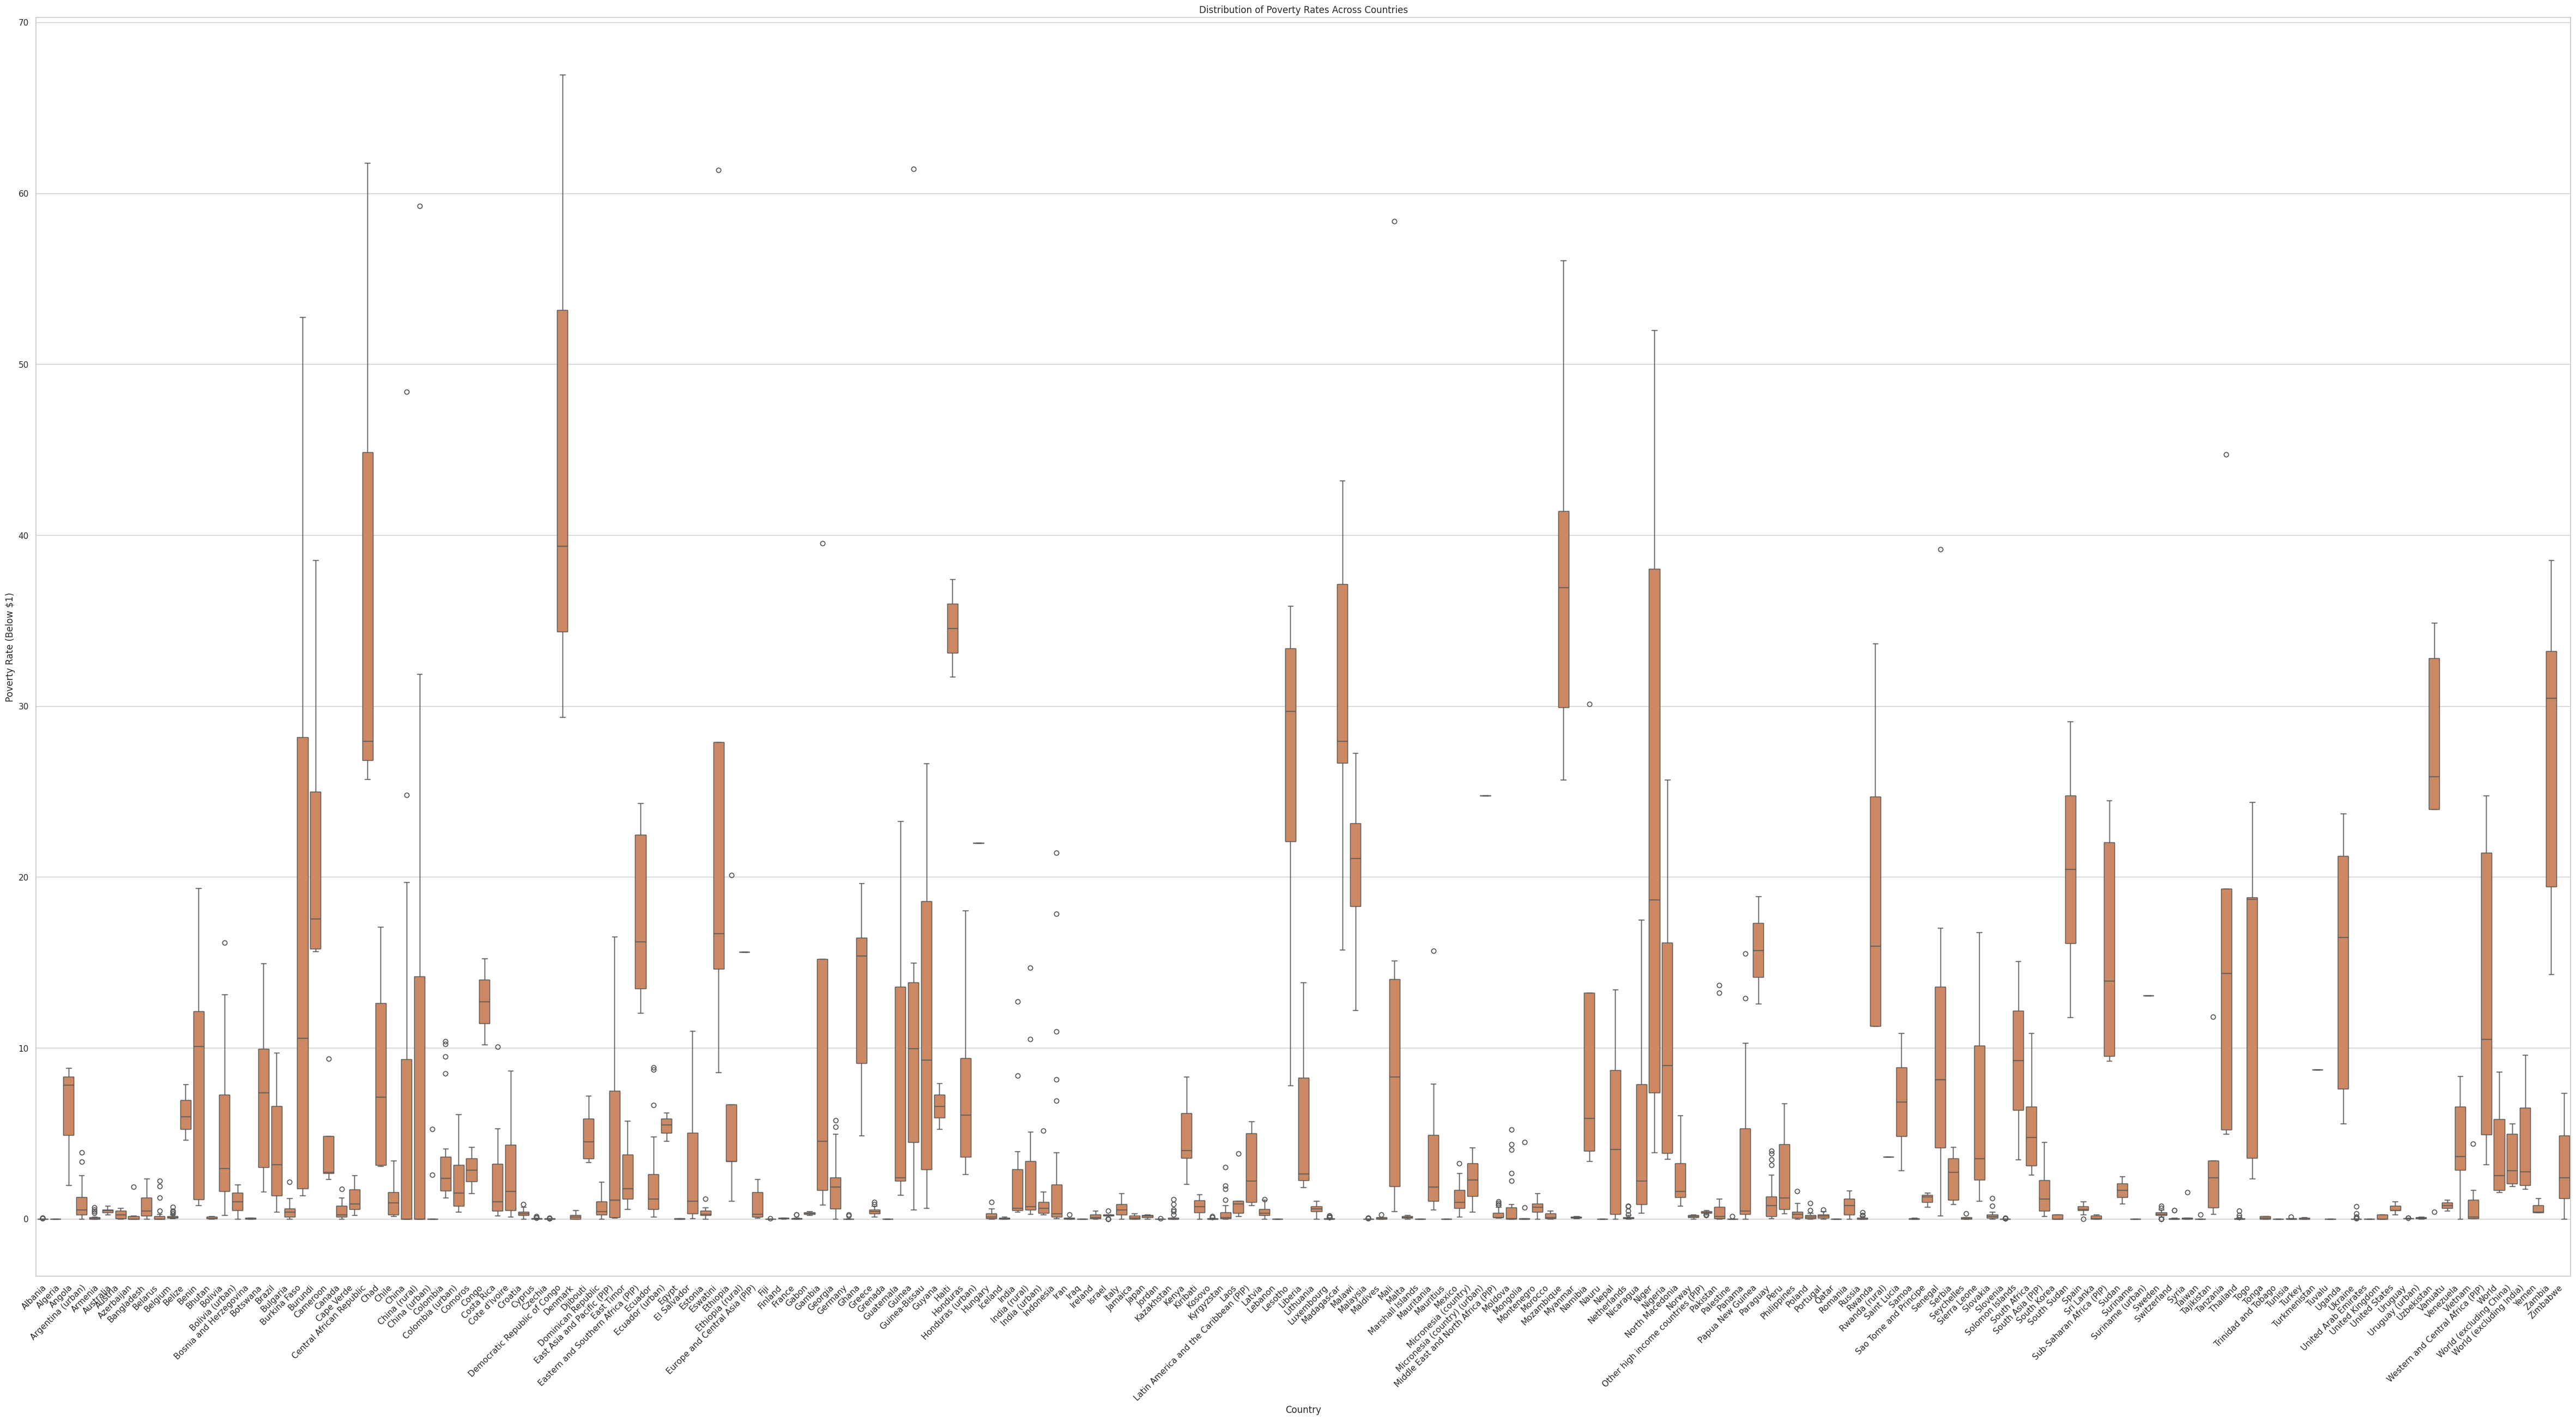

In [ ]:
plt.figure(figsize=(60, 30))
plt.xticks(rotation=45, ha='right', wrap=True)
sns.boxplot(x='Country', y='Share below $1 a day', data=df)
sns.boxplot(x='Country', y='Share below $1 a day', data=df)
plt.xlabel('Country')
plt.ylabel('Poverty Rate (Below $1)')
plt.title('Distribution of Poverty Rates Across Countries')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Identify countries with the highest and lowest average poverty rates
lowest_poverty_country_1_day = poverty_aggregates.loc[poverty_aggregates['Share below $1 a day'].idxmin()]
highest_poverty_country_1_day = poverty_aggregates.loc[poverty_aggregates['Share below $1 a day'].idxmax()]

Country with the lowest average poverty rate for $1 a day: Algeria
Country with the highest average poverty rate for $1 a day: Democratic Republic of Congo


In [ ]:
lowest_poverty_country_2_15_day = poverty_aggregates.loc[poverty_aggregates['Share below $2.15 a day'].idxmin()]
highest_poverty_country_2_15_day = poverty_aggregates.loc[poverty_aggregates['Share below $2.15 a day'].idxmax()]

In [ ]:
lowest_poverty_country_1_day, highest_poverty_country_1_day, lowest_poverty_country_2_15_day, highest_poverty_country_2_15_day


(Country                     Algeria
 Share below $1 a day            0.0
 Share below $2.15 a day    4.179667
 Name: 1, dtype: object,
 Country                    Democratic Republic of Congo
 Share below $1 a day                          45.221163
 Share below $2.15 a day                        80.03259
 Name: 40, dtype: object,
 Country                    Lebanon
 Share below $1 a day           0.0
 Share below $2.15 a day        0.0
 Name: 95, dtype: object,
 Country                    Democratic Republic of Congo
 Share below $1 a day                          45.221163
 Share below $2.15 a day                        80.03259
 Name: 40, dtype: object)

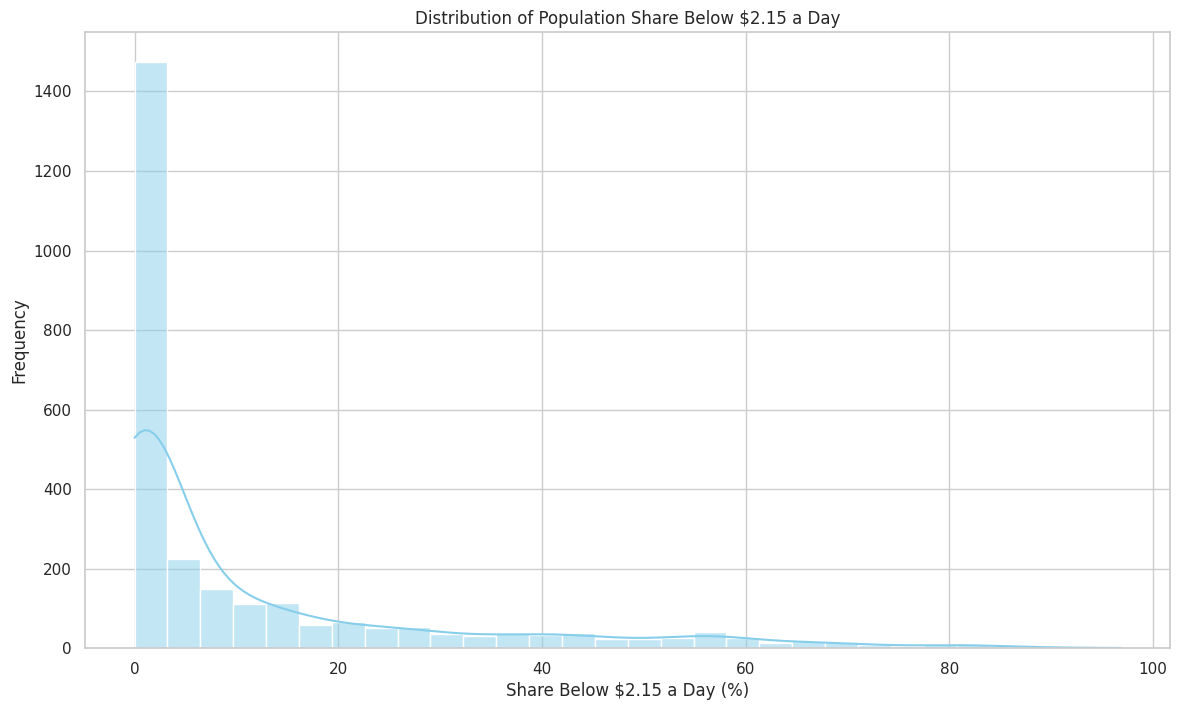

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Share below $2.15 a day', kde=True, color="skyblue", bins=30)
plt.title('Distribution of Population Share Below $2.15 a Day')
plt.xlabel('Share Below $2.15 a Day (%)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
selected_countries = lowest_poverty_country_1_day + highest_poverty_country_1_day
filtered_data = df[df['Country'].isin(selected_countries)]


In [ ]:
app = Dash(__name__)


app.layout = html.Div([
    html.H1("Poverty and Inequality Dashboard"),

    html.Div([
        html.Label("Select Country:"),
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in df['Country'].unique()],
            value=df['Country'].unique()[0],  # Set initial value
        ),
    ], style={'width': '30%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in df['Year'].unique()],
            value=df['Year'].max(),
        ),
    ], style={'width': '30%', 'display': 'inline-block', 'float': 'right'}),

    html.Div([
        dcc.Graph(id='poverty-rate-chart'),
    ], style={'width': '100%', 'display': 'inline-block'}),

    html.Div([
        dcc.Graph(id='income-distribution-chart'),
    ], style={'width': '100%', 'display': 'inline-block'}),

    html.Div([
        dcc.Graph(id='inequality-indicators-chart'),
    ], style={'width': '100%', 'display': 'inline-block'}),
])

@app.callback(
    [Output('poverty-rate-chart', 'figure'),
     Output('income-distribution-chart', 'figure'),
     Output('inequality-indicators-chart', 'figure')],
    [Input('country-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_charts(selected_country, selected_year):
    filtered_df = df[(df['Country'] == selected_country) & (df['Year'] == selected_year)]

  # Poverty Rate Chart
    poverty_rate_fig = px.line(
        filtered_df, x='Year', y=['Share below $1 a day', 'Share below $2.15 a day'],
        title=f'Poverty Rate Trend in {selected_country}'
    )

    # Income Distribution Chart
    income_distribution_fig = px.bar(
        filtered_df, x=['Share below $1 a day', 'Share below $2.15 a day', 'Share below $3.65 a day'],
        y='Country', orientation='h',
        title=f'Income Distribution in {selected_country} ({selected_year})'
    )

    # Inequality Indicators Chart
    inequality_indicators_fig = px.bar(
        filtered_df, x=['palma_ratio', 's80_s20_ratio', 'p90_p10_ratio'],
        y='Country', orientation='h',
        title=f'Inequality Indicators in {selected_country} ({selected_year})'
    )

    return poverty_rate_fig, income_distribution_fig, inequality_indicators_fig


if __name__ == '__main__':
    app.run_server(mode='inline')  # Use mode='external' if you want to open in a separate window


<IPython.core.display.Javascript object>

In [ ]:
!pip install -U ydata-profiling
!pip install numba==0.58.1

In [ ]:
from ydata_profiling import ProfileReport
df = pd.read_csv('.csv')

profile = ProfileReport(df, title="Poverty Rate Analysis", explorative=True)

profile.to_file("PovertyRate.html")

#from google.colab import files
#files.download("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib


In [ ]:
X = df.drop(columns=['Share below $1 a day'])
y = df['Share below $1 a day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
 df[col] = le.fit_transform(df[col])

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
 df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop(columns=['Share below $1 a day'])
y = df['Share below $1 a day']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.09864143962404597


In [ ]:
joblib.dump(model, 'poverty_model.pkl')

['poverty_model.pkl']

In [ ]:
loaded_model = joblib.load('poverty_model.pkl')

In [ ]:
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(sample_data)
print(f'Predicted share below $1 a day: {prediction[0]}')

Predicted share below $1 a day: 0.9252787190734018


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
